# Data Analysis with Pandas--Movies Survey

   
-Try inserting the list first 

-Test if it reads correctly

In [54]:
import pandas as pd
data = pd.read_csv('movies2.csv')
data.head(10)

,id,original_title,overview,release_date,popularity,vote_average,vote_count,genre_names
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,116.038,8.705,26221,"['Drama', 'Crime']"
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,167.834,8.695,19877,"['Drama', 'Crime']"
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,164.908,8.576,12001,"['Drama', 'Crime']"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,77.039,8.567,15409,"['Drama', 'History', 'War']"
4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,76.566,8.541,8276,['Drama']
5,19404,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,33.484,8.537,4388,"['Comedy', 'Drama', 'Romance']"
6,129,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,103.963,8.536,15949,"['Animation', 'Family', 'Fantasy']"
7,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,95.154,8.515,31978,"['Drama', 'Action', 'Crime', 'Thriller']"
8,496243,기생충,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,89.722,8.509,17573,"['Comedy', 'Thriller', 'Drama']"
9,497,The Green Mile,A supernatural tale set on death row in a Sout...,1999-12-10,88.370,8.500,16851,"['Fantasy', 'Drama', 'Crime']"


__List movies released in the latest year and month.__

-Find the latest year and month

-List the name of movies

In [55]:
# Convert release_date to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Drop rows with invalid release_date
data = data.dropna(subset=['release_date'])

# Find the latest year and month
latest_date = data['release_date'].max()
latest_year = latest_date.year
latest_month = latest_date.month

# Filter movies released in the latest year and month
latest_movies = data[(data['release_date'].dt.year == latest_year) &
                     (data['release_date'].dt.month == latest_month)]

# List the names of the movies
print(f"Movies released in the latest year ({latest_year}) and month ({latest_month}):")
print(latest_movies['original_title'].tolist())

Movies released in the latest year (2024) and month (5):
['Furiosa: A Mad Max Saga', 'The Idea of You', 'Kingdom of the Planet of the Apes', 'Atlas']


__What is the distribution of the number of movies in various genres?__


-Statistics on all movie categories and the number of movies under each category

-Draw plot

Distribution of the number of movies in various genres:
            Genre  Count
0        ['Drama'   1538
13    'Thriller']   1411
5       ['Comedy'   1366
23      ['Action'   1203
6         'Drama'   1068
..            ...    ...
56  ['Animation']      2
64    ['Mystery']      2
63    ['Romance']      2
69    ['Fantasy']      2
68        ['War']      1

[70 rows x 2 columns]


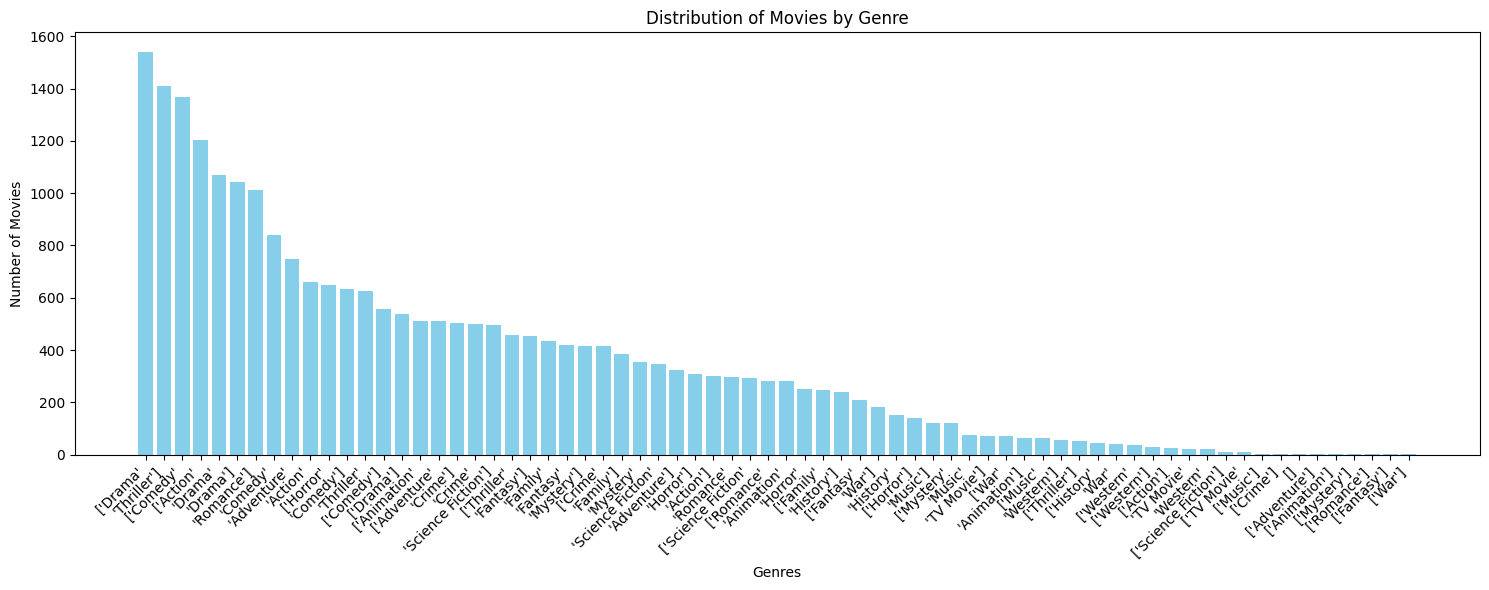

In [56]:
from collections import Counter
# Split genres and flatten the list
# Assuming `genre_names` contains genres separated by commas (e.g., "Action, Drama")
data['genre_names'] = data['genre_names'].fillna('')  # Handle missing genre data
all_genres = data['genre_names'].str.split(',').explode().str.strip()

# Count occurrences of each genre
genre_counts = Counter(all_genres)

# Create a DataFrame for better visualization
genre_distribution = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Print the distribution
print("Distribution of the number of movies in various genres:")
print(genre_distribution)

# Optional: Plot the distribution (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(genre_distribution['Genre'], genre_distribution['Count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


_Discover which movies are the most popular and talked about._

- Find the most popular movies


- Find the most talked-about movies (based on vote_count)




In [57]:
# Find the most popular movies
most_popular_movies = data.sort_values(by='popularity', ascending=False).head(10)
print("Top 10 Most Popular Movies:")
print(most_popular_movies[['original_title', 'popularity', 'vote_count']])

# Find the most talked-about movies (based on vote_count)
most_talked_about_movies = data.sort_values(by='vote_count', ascending=False).head(10)
print("\nTop 10 Most Talked-About Movies:")
print(most_talked_about_movies[['original_title', 'popularity', 'vote_count']])


Top 10 Most Popular Movies:
                         original_title  popularity  vote_count
2835  Kingdom of the Planet of the Apes    3629.389         647
2178    Godzilla x Kong: The New Empire    3148.883        2276
2245                          Civil War    2767.933         996
1937                       The Fall Guy    1915.521         815
1894                       The Fall Guy    1915.521         812
714             Furiosa: A Mad Max Saga    1193.177         412
139                      Dune: Part Two     874.167        4178
4430                              Atlas     820.285         368
200                         Oppenheimer     774.930        8133
855                             ゴジラ-1.0     755.261        1187

Top 10 Most Talked-About Movies:
               original_title  popularity  vote_count
48                  Inception     500.916       35768
24               Interstellar     492.112       34415
7             The Dark Knight      95.154       31978
1032              

_What were the most popular movies released in which year?_

- Convert release_date to datetime

- Drop rows with invalid release_date

- Find the most popular movie in each 5-year interval

- Calculate average revenue and rating for each director




In [58]:

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


data = data.dropna(subset=['release_date'])


data['release_year'] = data['release_date'].dt.year


data['5_year_group'] = (data['release_year'] // 5) * 5


most_popular_per_5_years = data.loc[data.groupby('5_year_group')['popularity'].idxmax()]


result = most_popular_per_5_years[['5_year_group', 'original_title', 'release_year', 'popularity']]
result = result.sort_values(by='5_year_group')


print("Most popular movies every 5 years:")
print(result)

Most popular movies every 5 years:
      5_year_group                         original_title  release_year  \
384           1900                 Le Voyage dans la Lune          1902   
7371          1915                  The Birth of a Nation          1915   
771           1920  Nosferatu, eine Symphonie des Grauens          1922   
169           1925                             Metropolis          1927   
1426          1930                               Scarface          1932   
1025          1935                       The Wizard of Oz          1939   
282           1940                           Citizen Kane          1941   
994           1945                          The Big Sleep          1946   
3008          1950                             Cinderella          1950   
311           1955                     North by Northwest          1959   
25            1960                                 Psycho          1960   
218           1965                  2001: A Space Odyssey        

_Is there a significant difference between the rating (vote_average) and the number of votes (vote_count) for some movies?_

- Drop rows where vote_average or vote_count are missing

- Calculate the correlation between vote_average and vote_count

- Print correlation and p-value

- Interpretation

Correlation between vote_average and vote_count: 0.28032061584747603
P-value: 2.8472214508768757e-169
There is a significant correlation between vote_average and vote_count.


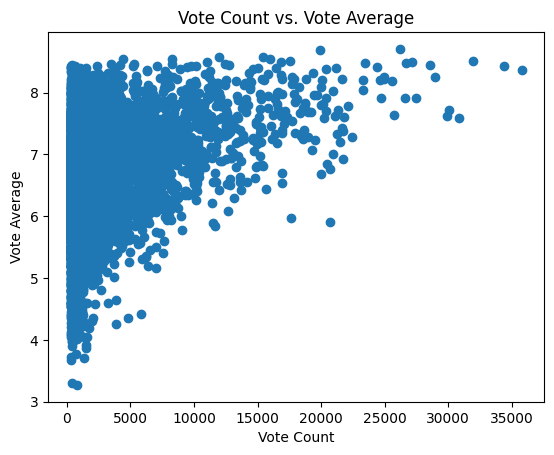

In [59]:
import scipy.stats as stats

data = data.dropna(subset=['vote_average', 'vote_count'])

correlation, p_value = stats.pearsonr(data['vote_average'], data['vote_count'])

print(f"Correlation between vote_average and vote_count: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between vote_average and vote_count.")
else:
    print("There is no significant correlation between vote_average and vote_count.")

import matplotlib.pyplot as plt

plt.scatter(data['vote_count'], data['vote_average'])
plt.title('Vote Count vs. Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

_Which movies can be considered “best movies” based on their ratings, popularity and number of votes? _

- Drop rows with missing ratings, popularity, or vote_count

- Normalize the data to avoid one feature dominating due to scale differences

- Sort by score in descending order and select top 10 best movies

In [61]:

data = data.dropna(subset=['vote_average', 'popularity', 'vote_count'])


data['normalized_rating'] = (data['vote_average'] - data['vote_average'].min()) / (data['vote_average'].max() - data['vote_average'].min())
data['normalized_popularity'] = (data['popularity'] - data['popularity'].min()) / (data['popularity'].max() - data['popularity'].min())
data['normalized_votes'] = (data['vote_count'] - data['vote_count'].min()) / (data['vote_count'].max() - data['vote_count'].min())

data['score'] = (data['normalized_rating'] * 0.4 + data['normalized_popularity'] * 0.3 + data['normalized_votes'] * 0.3)

best_movies = data[['original_title', 'vote_average', 'popularity', 'vote_count', 'score']].sort_values(by='score', ascending=False).head(10)


print("Top 10 Best Movies:")
print(best_movies[['original_title', 'vote_average', 'popularity', 'vote_count']])

Top 10 Best Movies:
               original_title  vote_average  popularity  vote_count
48                  Inception         8.368     500.916       35768
24               Interstellar         8.434     492.112       34415
7             The Dark Knight         8.515      95.154       31978
11               Pulp Fiction         8.489     528.384       27138
21                 Fight Club         8.441     297.770       28572
90     Avengers: Infinity War         8.246     280.129       28923
0    The Shawshank Redemption         8.705     116.038       26221
13               Forrest Gump         8.475     177.031       26660
107                The Matrix         8.216     569.070       24933
955                  Deadpool         7.612     546.317       29931


_What are the movies that have high ratings but low vote counts?_

- Filter movies with high ratings but low vote counts

- Normalize the data to bring all features to the same scale for representation

- Create a combined score (you can adjust weights if needed)

In [72]:

data = data.dropna(subset=['vote_average', 'vote_count'])

rating_threshold = 7.5  # High rating threshold (you can adjust this value)
vote_count_threshold = 1000  # Low vote count threshold (you can adjust this value)

high_rated_low_votes = data[(data['vote_average'] > rating_threshold) & (data['vote_count'] < vote_count_threshold)].copy()

high_rated_low_votes['normalized_rating'] = (high_rated_low_votes['vote_average'] - high_rated_low_votes['vote_average'].min()) / (high_rated_low_votes['vote_average'].max() - high_rated_low_votes['vote_average'].min())
high_rated_low_votes['normalized_popularity'] = (high_rated_low_votes['popularity'] - high_rated_low_votes['popularity'].min()) / (high_rated_low_votes['popularity'].max() - high_rated_low_votes['popularity'].min())
high_rated_low_votes['normalized_votes'] = (high_rated_low_votes['vote_count'] - high_rated_low_votes['vote_count'].min()) / (high_rated_low_votes['vote_count'].max() - high_rated_low_votes['vote_count'].min())

high_rated_low_votes['combined_score'] = (high_rated_low_votes['normalized_rating'] * 0.4 + high_rated_low_votes['normalized_popularity'] * 0.3 + high_rated_low_votes['normalized_votes'] * 0.3)

top_10_representative_movies = high_rated_low_votes[['original_title', 'vote_average', 'popularity', 'vote_count', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

print("Top 10 Most Representative Movies with High Ratings but Low Vote Counts:")
print(top_10_representative_movies[['original_title', 'vote_average', 'popularity', 'vote_count']])

Top 10 Most Representative Movies with High Ratings but Low Vote Counts:
                 original_title  vote_average  popularity  vote_count
42                           切腹         8.387      25.312         934
84                       Clouds         8.254      22.848         983
60                        天国と地獄         8.315      17.975         833
27                           소원         8.421      17.980         668
215                   신과함께-죄와 벌         8.082      32.812         968
223                Sherlock Jr.         8.100      17.424         936
113  Steven Universe: The Movie         8.206      20.971         807
88            シン・エヴァンゲリオン劇場版:||         8.250      28.709         759
220                       택시운전사         8.074      22.270         923
280              In a Heartbeat         8.007       9.671         984


_What are the movies with high ratings but average ratings?_

- Filter movies with high ratings but average ratings

- Normalize the data to bring all features to the same scale for representation


In [73]:
data = data.dropna(subset=['vote_average', 'vote_count'])


high_rating_threshold = 7.5  # High rating threshold
average_rating_range = (6.0, 7.5)  # Average rating range

high_rated_avg_movies = data[(data['vote_average'] > average_rating_range[0]) & 
                              (data['vote_average'] <= average_rating_range[1])].copy()

high_rated_avg_movies['normalized_rating'] = (high_rated_avg_movies['vote_average'] - high_rated_avg_movies['vote_average'].min()) / (high_rated_avg_movies['vote_average'].max() - high_rated_avg_movies['vote_average'].min())
high_rated_avg_movies['normalized_popularity'] = (high_rated_avg_movies['popularity'] - high_rated_avg_movies['popularity'].min()) / (high_rated_avg_movies['popularity'].max() - high_rated_avg_movies['popularity'].min())
high_rated_avg_movies['normalized_votes'] = (high_rated_avg_movies['vote_count'] - high_rated_avg_movies['vote_count'].min()) / (high_rated_avg_movies['vote_count'].max() - high_rated_avg_movies['vote_count'].min())

high_rated_avg_movies['combined_score'] = (high_rated_avg_movies['normalized_rating'] * 0.4 + high_rated_avg_movies['normalized_popularity'] * 0.3 + high_rated_avg_movies['normalized_votes'] * 0.3)

top_10_high_rated_avg_movies = high_rated_avg_movies[['original_title', 'vote_average', 'popularity', 'vote_count', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

print("Top 10 Most Representative Movies with High Ratings but Average Ratings:")
print(top_10_high_rated_avg_movies[['original_title', 'vote_average', 'popularity', 'vote_count']])

Top 10 Most Representative Movies with High Ratings but Average Ratings:
                       original_title  vote_average  popularity  vote_count
1544                   Doctor Strange         7.422     468.035       21615
1671                    Black Panther         7.384     559.019       21692
1849           Spider-Man: Homecoming         7.336     330.354       21241
1307                       Deadpool 2         7.487     403.039       17094
2084          Avengers: Age of Ultron         7.273     119.293       22460
2270                     Wonder Woman         7.227     564.592       19539
1503                        John Wick         7.400      99.539       18683
1432                      Baby Driver         7.450     462.504       15242
1825                            Split         7.344     506.377       16916
2178  Godzilla x Kong: The New Empire         7.237    3148.883        2276
